<img src="https://raw.githubusercontent.com/dask/dask/main/docs/source/images/dask_horizontal.svg"
     width="60%"
     alt="Dask logo\" />

# Time for a Test Drive!

You've spent some time walking around the Dascar lot, hearing about all the awesome features and specs...

That's enough talk! Let's jump into a racecar and see what it can do!

We'll test drive:

1. Dask DataFrames for faster & scalable pandas
2. Dask Arrays for faster & scalable NumPy
3. Dask-ML for faster & scalable scikit-learn
4. Coiled for cluster spin-up

![](images/racecar.png "Title")

## Dask DataFrames

The pandas car...with the Dask engine!

In [1]:
import dask.dataframe as dd

In [2]:
%run ../prep_data.py -d flights

data_dir='/Users/rpelgrim/Documents/git/my-forks/dask-mini-tutorial/data'


In [3]:
import os

files = os.path.join('../data', 'nycflights', '*.csv')
files

'../data/nycflights/*.csv'

In [4]:
df = dd.read_csv(files,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={"TailNum": str,
                        "CRSElapsedTime": float,
                        "Cancelled": bool})

In [5]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0


In [6]:
%%time
df.groupby("Origin")["DepDelay"].mean().compute()

CPU times: user 3.26 s, sys: 715 ms, total: 3.98 s
Wall time: 1.87 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

### A slight difference with pandas
Notice the `.compute()` call: this is necessary because Dask operates using something called **lazy evaluation**.

If you haven't heard about lazy evaluation before, check out [the Beginner's Guide to Distributed Computing](https://towardsdatascience.com/the-beginners-guide-to-distributed-computing-6d6833796318).

In [7]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
,datetime64[ns],int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,bool,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Dask Arrays

The Numpy car...with Dask engine superpowers!

In [8]:
import dask.array as da

In [9]:
array = da.random.random((10_000, 10_000), chunks=(1_000, 1_000))

In [10]:
array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [11]:
array[:10,:5]

dask.array<getitem, shape=(10, 5), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [12]:
array[:10,:5].compute()

array([[0.92130684, 0.86070512, 0.11605024, 0.11553174, 0.4990071 ],
       [0.74833338, 0.2204745 , 0.35247391, 0.86323082, 0.40562457],
       [0.25967766, 0.14480874, 0.79849843, 0.6989671 , 0.49750989],
       [0.62183113, 0.3487165 , 0.93402267, 0.99822053, 0.27666799],
       [0.26566648, 0.98367448, 0.05768839, 0.36512914, 0.0146784 ],
       [0.72778993, 0.35222191, 0.96430235, 0.8740488 , 0.80824513],
       [0.60602986, 0.64918407, 0.9834412 , 0.90817002, 0.0951104 ],
       [0.84628454, 0.70635578, 0.89299325, 0.09074857, 0.80173271],
       [0.2902147 , 0.8959439 , 0.16148598, 0.96459237, 0.30049858],
       [0.84406073, 0.7922105 , 0.17670474, 0.07362167, 0.84345768]])

In [13]:
%%time
array.sum(axis=1).compute()

CPU times: user 605 ms, sys: 114 ms, total: 719 ms
Wall time: 163 ms


array([5038.28818559, 4976.88347989, 4977.22767265, ..., 4950.82651208,
       5044.47822607, 5009.04807987])

## Dask ML

The scikit-learn car with.... you guessed it -- Dask rocketfuel!

In [1]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1_000, chunks=50)

In [3]:
X

dask.array<normal, shape=(1000, 20), dtype=float64, chunksize=(50, 20), chunktype=numpy.ndarray>

In [4]:
y

dask.array<astype, shape=(1000,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [5]:
lr = LogisticRegression()

In [6]:
%%time
lr.fit(X, y)

CPU times: user 2.96 s, sys: 743 ms, total: 3.7 s
Wall time: 3.08 s


LogisticRegression()

In [7]:
%%time
predictions = lr.predict(X).compute()

CPU times: user 13.9 ms, sys: 2.14 ms, total: 16.1 ms
Wall time: 15 ms


In [8]:
lr.score(X,y).compute()

0.643

# Digging Deeper

Dask's lower-level APIs give you even more flexibility and control over what / how to parallelize your custom Python code.

## Parallelize Python Code with `dask.delayed`

In [9]:
from time import sleep

def inc(x):
    """Increments x by one"""
    sleep(1)
    return x + 1

def add(x=0, y=0, z=0):
    """Adds x and y and z"""
    sleep(1)
    return x + y + z

In [10]:
%%time

x = inc(1) # takes 1 second
y = inc(2) # takes 1 second
z = add(x, y) # takes 1 second

CPU times: user 868 µs, sys: 1.37 ms, total: 2.24 ms
Wall time: 3 s


In [11]:
z

5

In [12]:
from dask import delayed

In [13]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 413 µs, sys: 53 µs, total: 466 µs
Wall time: 437 µs


In [14]:
c

Delayed('add-70b584d1-71db-4179-bbff-34192cde6294')

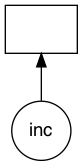

In [15]:
a.visualize()

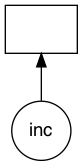

In [16]:
b.visualize()

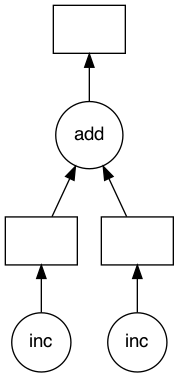

In [17]:
c.visualize()

In [18]:
%%time
c.compute()

CPU times: user 2.53 ms, sys: 2.25 ms, total: 4.78 ms
Wall time: 2.01 s


5

In [19]:
d = delayed(inc)(3)

In [20]:
c = delayed(add)(a, b, d)

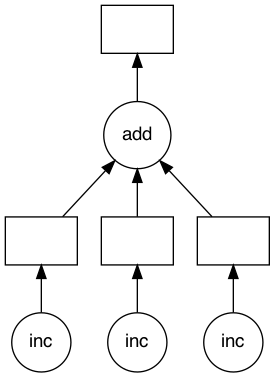

In [21]:
c.visualize()

In [22]:
%%time
c.compute()

CPU times: user 3.2 ms, sys: 2.6 ms, total: 5.8 ms
Wall time: 2.01 s


9

Task graphs can get...complicated:

<img src="https://raw.githubusercontent.com/coiled/pydata-global-dask/master/images/grid_search_schedule.gif"
     width="95%"
     alt="Grid search schedule\" />

## Dask Cluster on Coiled

To launch your own Coiled clusters:
1. Create an account at [cloud.coiled.io](cloud.coiled.io)
2. Open a terminal
3. Create a new conda env and activate it
4. Run `conda install -c conda-forge coiled-runtime`
5. Run `coiled login`

You’ll then be asked to login to the Coiled web interface. Normally you'd navigate to https://cloud.coiled.io/profile where you can create and manage API tokens. This requires setting up some cloud credentials. To bypass that for this tutorial, we'll use a test account that's already set up.

```
Please login to https://cloud.coiled.io/profile to get your token
Token:
```

Copy the following token and press Enter:
TOKEN
    
This token will be destroyed immediately after this tutorial. To continue using Coiled after the tutorial, connect your Coiled account to your AWS/GCP cloud by following the steps [here](https://docs.coiled.io/user_guide/backends.html).

In [1]:
import coiled

In [2]:
coiled.create_software_environment(
    account="coiled-examples",
    name="dask-tutorial",
    conda="../environment.yml"
)

Creating new software environment
Creating new ecr build
STEP 1: FROM coiled/default:sha-6b4e896
STEP 2: COPY environment.yml environment.yml
--> dc2089255b9
STEP 3: RUN conda env update -n coiled -f environment.yml     && rm environment.yml     && conda clean --all -y     && echo "conda activate coiled" >> ~/.bashrc
Solving environment: ...working... done

xorg-xextproto-7.3.0 | 28 KB     | ########## | 100% 
googleapis-common-pr | 122 KB    | ########## | 100% 
gdk-pixbuf-2.42.8    | 595 KB    | ########## | 100% 
py-xgboost-1.5.0     | 151 KB    | ########## | 100% 
libcblas-3.9.0       | 12 KB     | ########## | 100% 
xorg-kbproto-1.0.7   | 27 KB     | ########## | 100% 
xorg-libsm-1.2.3     | 26 KB     | ########## | 100% 
fribidi-1.0.10       | 112 KB    | ########## | 100% 
pixman-0.40.0        | 627 KB    | ########## | 100% 
aiosignal-1.2.0      | 12 KB     | ########## | 100% 
dask-ml-2022.5.27    | 105 KB    | ########## | 100% 
terminado-0.15.0     | 28 KB     | ########## 

In [2]:
cluster = coiled.Cluster(
    name="dask-tutorial", 
    n_workers=20, 
    worker_memory='25Gib',
    software="rrpelgrim/dask-mini-tutorial",
    scheduler_options={'idle_timeout':'3 hours'}, # default is 20min
    shutdown_on_close=False,
    backend_options={'spot': 'True'},
)

Output()

Found software environment build
Created fw rule: inbound [8786-8787] [0.0.0.0/0] []
Created FW rules: coiled-dask-rrpelgr71-140885-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-rrpelgr71-140885-firewall -> coiled-dask-rrpelgr71-140885-firewall]
Created FW rules: coiled-dask-rrpelgr71-140885-cluster-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-rrpelgr71-140885-cluster-firewall -> coiled-dask-rrpelgr71-140885-cluster-firewall]
Created scheduler VM: coiled-dask-rrpelgr71-140885-scheduler (type: t3a.medium, ip: ['35.170.79.115'])


In [36]:
from distributed import Client

client = Client(cluster)
client

/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| pandas  | 1.4.2  | 1.4.0     | 1.4.0   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tls://10.4.8.233:8786' processes=20 threads=160, memory=620.19 GiB>

In [37]:
import dask.dataframe as dd

In [38]:
df = dd.read_csv(
    "s3://nyc-tlc/trip data/yellow_tripdata_2019-*.csv",
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"],
    dtype={
        "payment_type": "UInt8",
        "VendorID": "UInt8",
        "passenger_count": "UInt8",
        "RatecodeID": "UInt8",
        "store_and_fwd_flag": "category",
        "PULocationID": "UInt16",
        "DOLocationID": "UInt16",
    },
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [39]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
npartitions=471,,,,,,,,,,,,,,,,,,
,UInt8,datetime64[ns],datetime64[ns],UInt8,float64,UInt8,category[unknown],UInt16,UInt16,UInt8,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [40]:
%%time
df.groupby("passenger_count").tip_amount.mean().compute()

CPU times: user 263 ms, sys: 88.7 ms, total: 351 ms
Wall time: 38.3 s


passenger_count
0    2.122789
1    2.206790
2    2.214306
3    2.137775
4    2.023804
5    2.235441
6    2.221105
7    6.675962
8    7.111625
9    7.377822
Name: tip_amount, dtype: float64